Kaggle competition
#### House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## The Data

We will be using data from a Kaggle dataset:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### File descriptions
* train.csv - the training set  
* test.csv - the test set  
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here  
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms  

#### Feature Columns
    
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  

* MSSubClass: The building class  
* MSZoning: The general zoning classification  
* LotFrontage: Linear feet of street connected to property  
* LotArea: Lot size in square feet  
* Street: Type of road access  
* Alley: Type of alley access  
* LotShape: General shape of property  
* LandContour: Flatness of the property  
* Utilities: Type of utilities available  
* LotConfig: Lot configuration  
* LandSlope: Slope of property  
* Neighborhood: Physical locations within Ames city limits  
* Condition1: Proximity to main road or railroad  
* Condition2: Proximity to main road or railroad (if a second is present)  
* BldgType: Type of dwelling  
* HouseStyle: Style of dwelling  
* OverallQual: Overall material and finish quality  
* OverallCond: Overall condition rating  
* YearBuilt: Original construction date  
* YearRemodAdd: Remodel date  
* RoofStyle: Type of roof  
* RoofMatl: Roof material  
* Exterior1st: Exterior covering on house  
* Exterior2nd: Exterior covering on house (if more than one material)  
* MasVnrType: Masonry veneer type  
* MasVnrArea: Masonry veneer area in square feet  
* ExterQual: Exterior material quality  
* ExterCond: Present condition of the material on the exterior  
* Foundation: Type of foundation  
* BsmtQual: Height of the basement  
* BsmtCond: General condition of the basement  
* BsmtExposure: Walkout or garden level basement walls  
* BsmtFinType1: Quality of basement finished area  
* BsmtFinSF1: Type 1 finished square feet  
* BsmtFinType2: Quality of second finished area (if present)  
* BsmtFinSF2: Type 2 finished square feet  
* BsmtUnfSF: Unfinished square feet of basement area  
* TotalBsmtSF: Total square feet of basement area  
* Heating: Type of heating  
* HeatingQC: Heating quality and condition  
* CentralAir: Central air conditioning  
* Electrical: Electrical system  
* 1stFlrSF: First Floor square feet  
* 2ndFlrSF: Second floor square feet  
* LowQualFinSF: Low quality finished square feet (all floors)  
* GrLivArea: Above grade (ground) living area square feet  
* BsmtFullBath: Basement full bathrooms  
* BsmtHalfBath: Basement half bathrooms  
* FullBath: Full bathrooms above grade  
* HalfBath: Half baths above grade  
* Bedroom: Number of bedrooms above basement level  
* Kitchen: Number of kitchens   
* KitchenQual: Kitchen quality  
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
* Functional: Home functionality rating  
* Fireplaces: Number of fireplaces  
* FireplaceQu: Fireplace quality  
* GarageType: Garage location  
* GarageYrBlt: Year garage was built  
* GarageFinish: Interior finish of the garage  
* GarageCars: Size of garage in car capacity  
* GarageArea: Size of garage in square feet  
* GarageQual: Garage quality  
* GarageCond: Garage condition   
* PavedDrive: Paved driveway  
* WoodDeckSF: Wood deck area in square feet  
* OpenPorchSF: Open porch area in square feet  
* EnclosedPorch: Enclosed porch area in square feet  
* 3SsnPorch: Three season porch area in square feet  
* ScreenPorch: Screen porch area in square feet  
* PoolArea: Pool area in square feet   
* PoolQC: Pool quality  
* Fence: Fence quality  
* MiscFeature: Miscellaneous feature not covered in other categories  
* MiscVal: $Value of miscellaneous feature  
* MoSold: Month Sold  
* YrSold: Year Sold  
* SaleType: Type of sale  
* SaleCondition: Condition of sale  

# Import libraries and data

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
df = pd.read_csv('data/train.csv', index_col=0)
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [192]:
df['TotalBsmtSF'].describe()

KeyError: 'TotalBsmtSF'

In [191]:
df[['BsmtFinSF1', 'BsmtUnfSF']][df['BsmtFinSF1']==0]

,BsmtFinSF1,BsmtUnfSF
Id,,
9,0,952
14,0,1494
16,0,832
18,0,0
21,0,1158
...,...,...
1449,0,560
1451,0,896
1452,0,1573


In [161]:
df.shape

(1460, 80)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Correlation

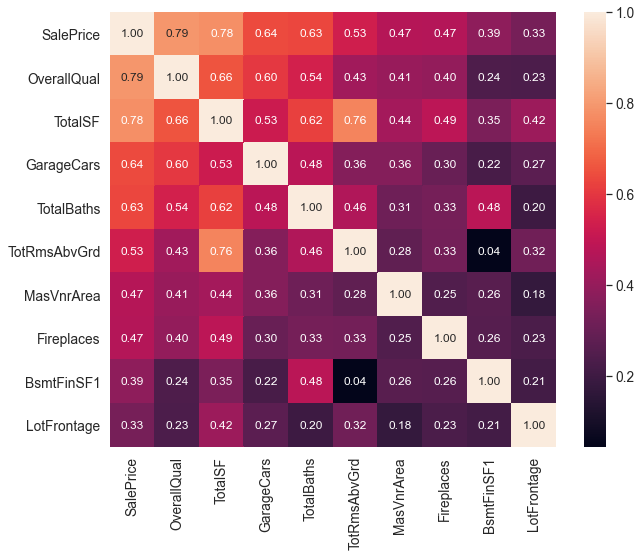

In [193]:
corrmat = df.corr()
plt.figure(figsize=(10,8))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # columns that are highest correlated to SalePrice
cm = np.corrcoef(df[cols].values.T) # correlation coefficient of columns highest correlated with SalePrice
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Combining values

#### Combine house square footage to one feature, consisting of: 
TotalBsmtSF: Total square feet of basement area  
1stFlrSF: First Floor square fee  
2ndFlrSF: Second floor square feet  
GrLivArea: Above grade (ground) living area square feet

In [162]:
#Add a new column totalSF
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']

#### Space for cars:  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
Because they both represent the area for cars, though in different ways, we will remove one. We will remove GarageArea because GarageCars has a higher correlation with SalePrice as seen on above heatmap. 

#### Combine the number of bathrooms: 
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  

In [163]:
#adding a new column TotalBaths
df['TotalBaths'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']

#### Remodeling
Find houses where the year built and remodeling is the same, which means no remodeling actually happened.  
Create a new feature for how old was the house(how many years from being built or remodeled) when sold.   
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
YrSold: Year Sold

In [164]:
# Add new features
df['Remodeled'] = np.where(df['YearRemodAdd'] == df['YearBuilt'], 'No', 'Yes') # No for houses that were never remodeled
df['Age when Sold'] = df['YrSold'] - df['YearRemodAdd'] # how many years after being remodeled is the house sold

### Drop features that were combined

In [165]:
remove_cols = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath', 'GarageArea', 'YearRemodAdd','YearBuilt','YrSold']
df.drop(remove_cols, axis=1, inplace=True)

# Dealing with missing values

### Remove columns with more than 50% of missing data

In [166]:
"""
A function to find columns where there is more than 50% of data missing. 
We will compare the number of available data to all rows in the column to find the percentage of missing data. 
We'll return a list of column names where available data is lower than 50%.
"""
def missingvalues(df):
    missing_values = []
    for column in df:
        notnull = sum(df[column].notnull())
        l = len(df)
        available_data = notnull/l*100
        if available_data < 50: 
            missing_values.append(column)
    return missing_values

In [167]:
cols_miss = missingvalues(df)
# Columns missing more than 50% of data
print(cols_miss)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [168]:
# Delete found columns
df = df.drop(cols_miss, axis=1)

### Check for low variance

In [169]:
"""
A function to find low variance data. 
Checks if the most recurrent value of the feature is repeated in almost all instances. 
x is percentage of uniform values. 
Return a list of column names where data is same for x%. 
"""
def low_variance(df, x):
    low_var = []
    for i in df.columns:
        counts = df[i].value_counts()
        top = counts.iloc[0]
        if top / len(df) * 100 > x:
            low_var.append(i)
    return low_var

In [170]:
# 90% of data is the same
cols_low = low_variance(df, 90)
print(cols_low)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [171]:
# Drop columns with low variance
df = df.drop(cols_low, axis=1)

### Decide what to do with rest of missing values

In [180]:
# NaN values
null_values = df.isnull().sum().sort_values(ascending=False).head(15)
print(null_values)

MasVnrType       8
Age when Sold    0
BsmtExposure     0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
MasVnrArea       0
Exterior2nd      0
Exterior1st      0
RoofStyle        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
dtype: int64


In [173]:
# numerical data types i.e int64, should be imputed or fillna(0)
[col for col in null_values.index if df[col].dtype not in ['object']]

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [174]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df['MasVnrType'].fillna('NA', inplace = True)
df.drop('FireplaceQu', axis=1, inplace=True)
df.drop('BedroomAbvGr', axis=1, inplace=True) 

In [175]:
df['GarageQual'].fillna('NA', inplace = True)
df['GarageFinish'].fillna('NA', inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)
df['GarageType'].fillna('NA', inplace = True)

In [179]:
df['BsmtQual'].fillna('NA', inplace = True)
df['BsmtCond'].fillna('NA', inplace = True)
df['BsmtExposure'].fillna('NA', inplace = True)
df['BsmtFinType1'].fillna('NA', inplace = True)
df['BsmtFinType2'].fillna('NA', inplace = True)

In [176]:
# categorical
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')
df['GarageYrBlt'] = df['GarageYrBlt'].astype('category')

In [117]:
# turning object columns into category columns
# it's a good practice to typecast categorical features to a category dtype because 
# they make the operations on such columns much faster than the object dtype.
for i in df.select_dtypes(include='object').columns.to_list():
    df[i] = df[i].astype('category')

In [128]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [118]:
# list w/ categorical variables
cater_cols = df.select_dtypes(include='category').columns.to_list()
cater_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'SaleType',
 'SaleCondition',
 'Remodeled']

/Users/helenahook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


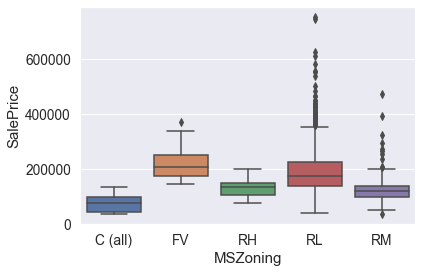

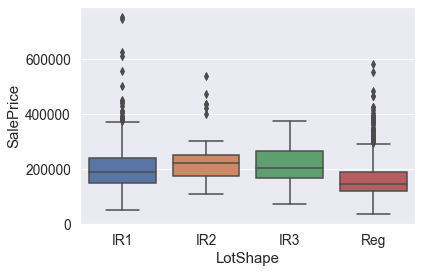

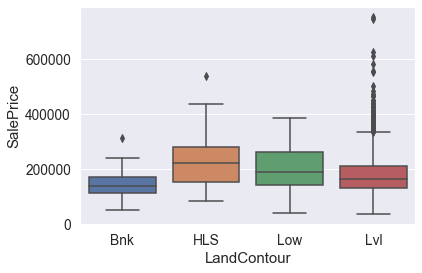

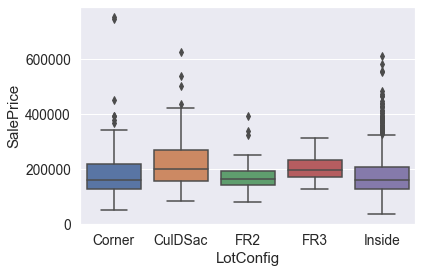

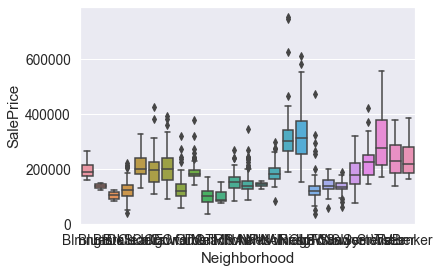

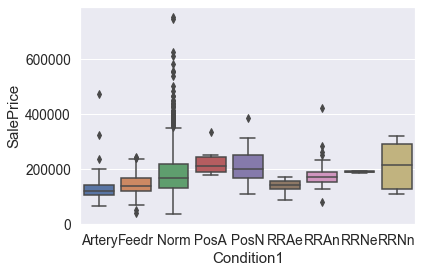

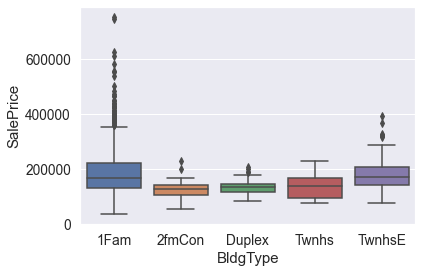

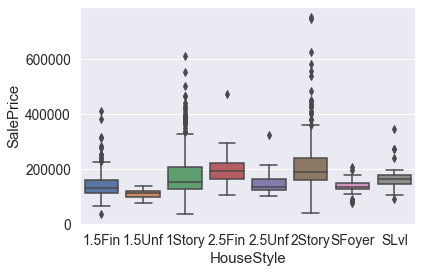

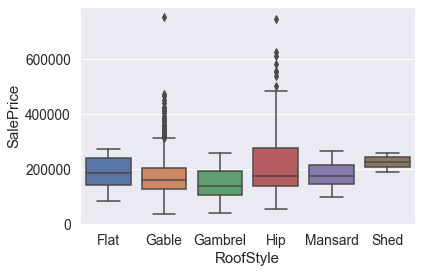

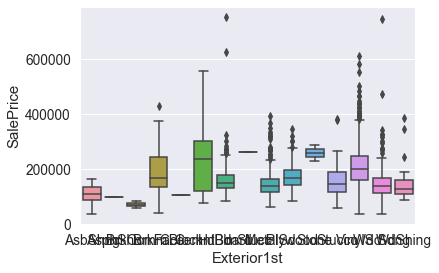

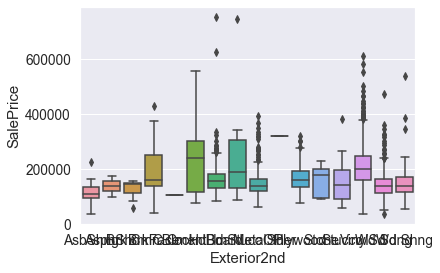

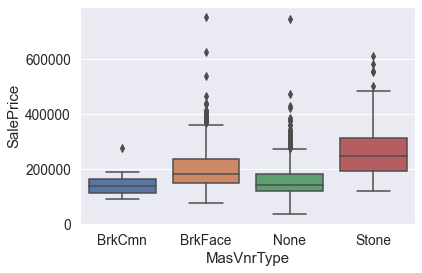

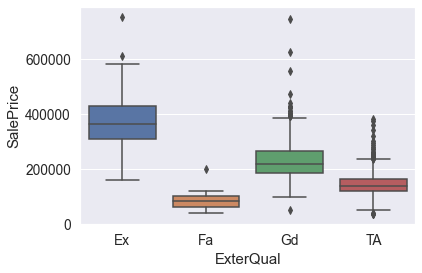

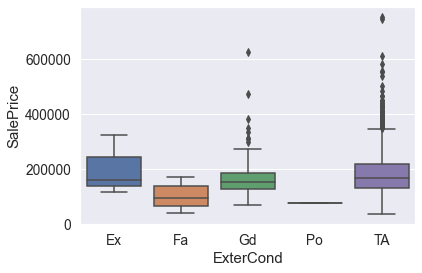

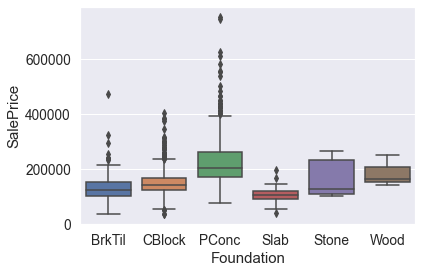

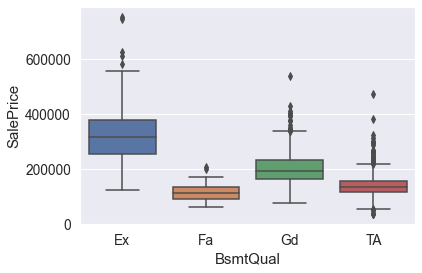

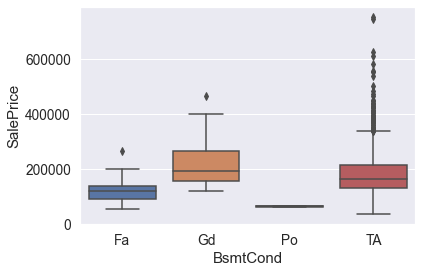

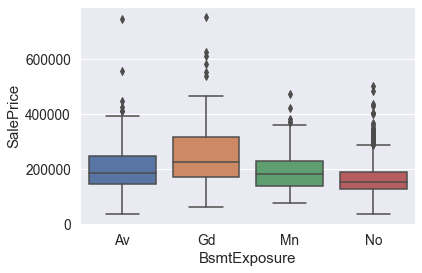

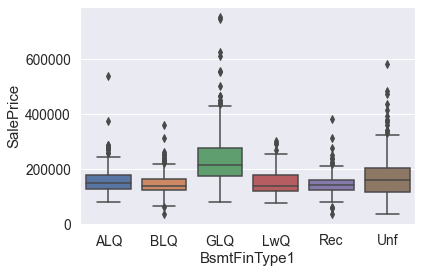

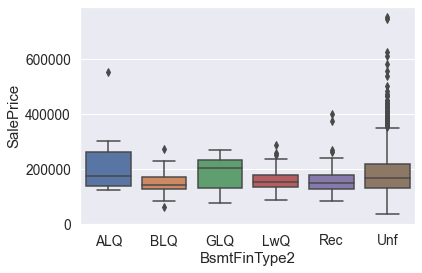

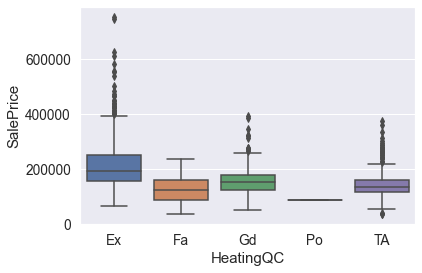

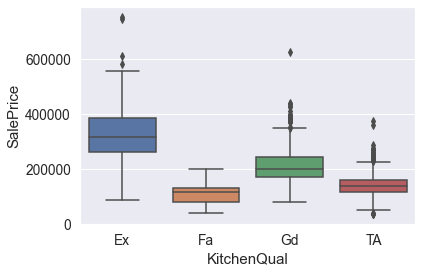

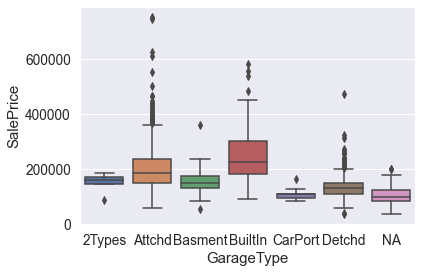

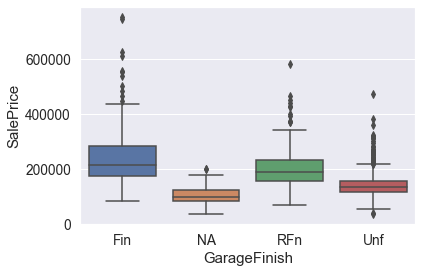

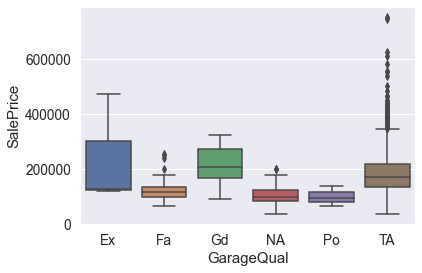

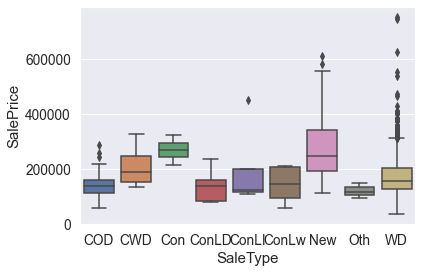

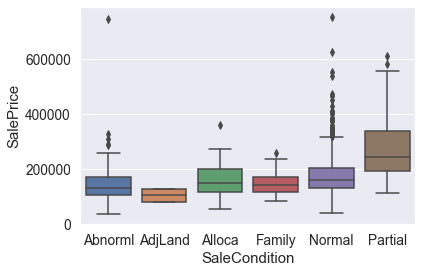

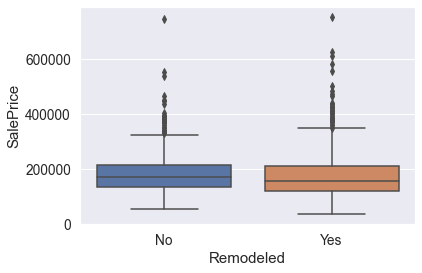

In [126]:
# categorical variables vs. SalePrice TAKES TIME
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = df)

In [127]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

In [58]:
# count the number of 0 values for each column
num_missing = (df[df.columns] == 0).sum().sort_values(ascending=False).head(15)
# report the results
print('Columns with most 0 values:\n', num_missing)

Columns with most 0 values:
 BsmtFinSF2       1293
EnclosedPorch    1252
MasVnrArea        869
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
Age when Sold     124
BsmtUnfSF         118
GarageCars         81
BedroomAbvGr        6
MoSold              0
TotalBaths          0
MasVnrType          0
Exterior2nd         0
dtype: int64


In [59]:
# numerical data types i.e int64, should be imputed or fillna(0)
[col for col in num_missing.index if df[col].dtype not in ['object']]

['BsmtFinSF2',
 'EnclosedPorch',
 'MasVnrArea',
 'WoodDeckSF',
 'Fireplaces',
 'OpenPorchSF',
 'BsmtFinSF1',
 'Age when Sold',
 'BsmtUnfSF',
 'GarageCars',
 'BedroomAbvGr',
 'MoSold',
 'TotalBaths']

In [228]:
# Store found column names in a list
cols = num_missing.index.tolist()

# Replace 0 values in found columns with NaN
df[cols] = df[cols].replace(0, float('NaN'))

### continue

In [184]:
# Variables correlation with Sale Price
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.777123
GarageCars       0.640409
TotalBaths       0.631731
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
OverallCond     -0.077856
EnclosedPorch   -0.128578
Age when Sold   -0.509079
Name: SalePrice, dtype: float64

In [183]:
# features to remove based on low correlation to saleprice
df.drop(['BsmtFinSF2', 'OverallCond'], axis=1, inplace=True)